In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [3]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [11]:
dataset=df
X = dataset.iloc[:,6].values
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[-0.69721342],
       [ 0.14018896],
       [ 1.0268503 ],
       ...,
       [ 0.71487686],
       [-1.05844582],
       [-0.64795446]])

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1588   26]
 [ 343   43]]


0.8155

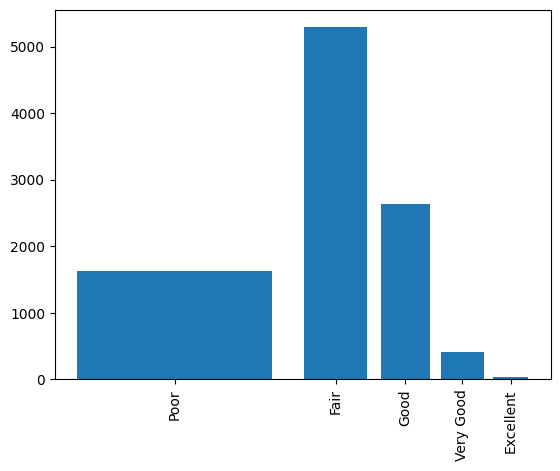

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')
fico = df['fico_score']

#max fico score 850 and min is 408
#mean is 638

#buckets that go in increments of 50
bins = [300, 579, 669, 739, 800, 850]
bin_names = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

midpoints = []
for i in range(len(bins) - 1):
    midpoints.append(((bins[i] + bins[i+1]) / 2))

plt.hist(fico, bins=bins, rwidth = 0.8)
plt.xticks(midpoints, labels = bin_names, rotation = 90)

poor = []
fair = []
good = []
very_good = []
excellent = []

for i in  fico:
    if i < 579:
        poor.append(i)
    elif i >= 579 and i < 669:
        fair.append(i)
    elif i >= 669 and i < 739:
        good.append(i)
    elif i >= 739 and i < 800:
        very_good.append(i)
    else:
        excellent.append(i)

In [23]:
#mean squared error
mse_poor = 0
mean_poor = np.mean(poor)

for i in poor:
    mse_poor += (i - mean_poor)**2

mse_poor = mse_poor/len(poor)


mse_fair = 0
mean_fair = np.mean(fair)

for i in fair:
    mse_fair += (i - mean_fair)**2

mse_fair = mse_fair/len(fair)


mse_good = 0
mean_good = np.mean(good)

for i in good:
    mse_good += (i - mean_good)**2

mse_good = mse_good/len(good)


mse_very_good = 0
mean_very_good = np.mean(very_good)

for i in very_good:
    mse_very_good += (i - mean_very_good)**2

mse_very_good = mse_very_good/len(very_good)


mse_excellent = 0
mean_excellent = np.mean(excellent)
for i in excellent:
    mse_excellent += (i - mean_excellent)**2

mse_excellent = mse_excellent/len(excellent)

In [24]:
fico_check = int(input("Enter your fico score to get a rating: "))

if fico_check < 579:
    print("Your rating is " + str(mse_poor))
elif fico_check >= 579 and fico_check < 669:
    print("Your rating is " + str(mse_fair))
elif fico_check >= 669 and fico_check < 739:
    print("Your rating is " + str(mse_good))
elif fico_check >= 739 and fico_check < 800:
    print("Your rating is " + str(mse_very_good))
else:
    print("Your rating is " + str(mse_excellent))

Enter your fico score to get a rating: 450
Your rating is 838.1496751715999
